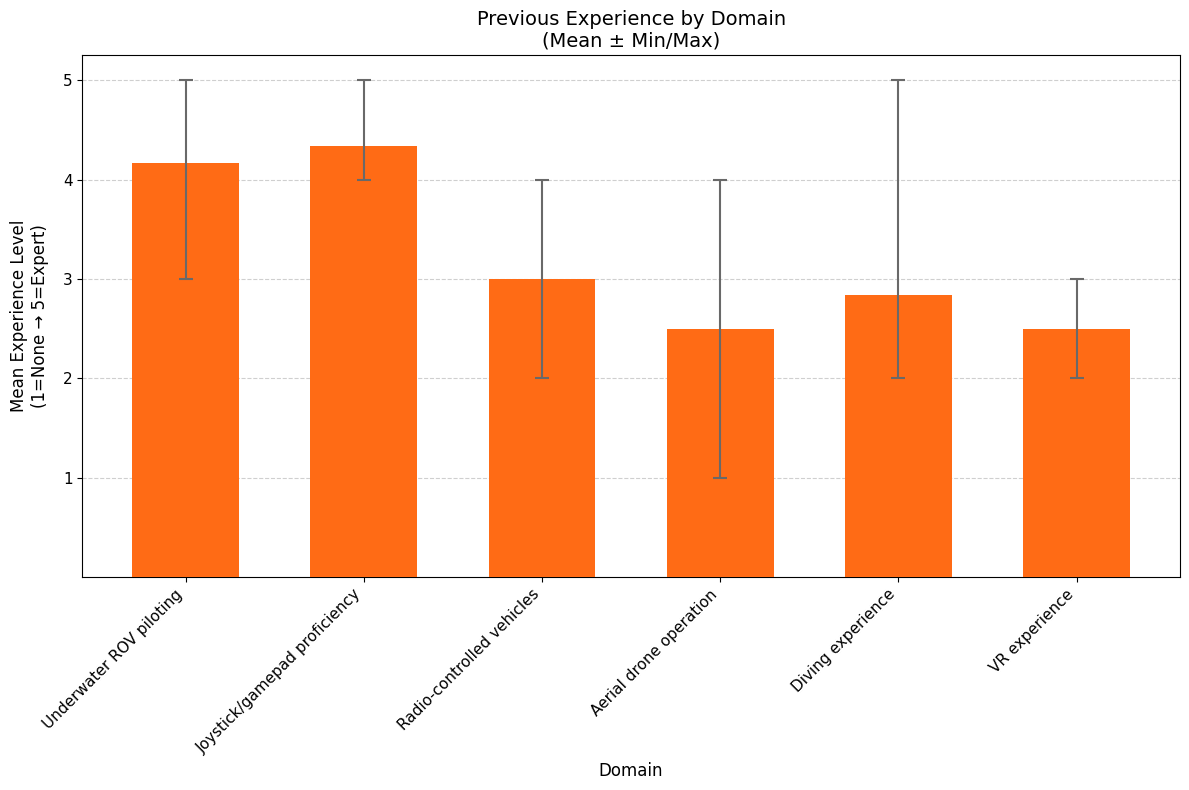

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ——— Define your experience data ———
data = {
    'Domain': [
        'Underwater ROV piloting',
        'Joystick/gamepad proficiency',
        'Radio‐controlled vehicles',
        'Aerial drone operation',
        'Diving experience',
        'VR experience'
    ],
    '1 (None)':      [0, 0, 0, 1, 0, 0],
    '2 (Novice)':    [0, 0, 2, 2, 4, 3],
    '3 (Intermediate)': [1, 0, 2, 2, 0, 3],
    '4 (Advanced)':  [3, 4, 2, 1, 1, 0],
    '5 (Expert)':    [2, 2, 0, 0, 1, 0]
}
df = pd.DataFrame(data).set_index('Domain')

# ——— Compute weighted mean + min/max per domain ———
levels = np.array([1, 2, 3, 4, 5])
counts = df.values
total_counts = counts.sum(axis=1)

# mean rating per domain
means = (counts * levels).sum(axis=1) / total_counts

# min observed level (first non-zero)
mins = np.array([levels[row.nonzero()[0][0]] for row in counts])

# max observed level (last non-zero)
maxs = np.array([levels[row.nonzero()[0][-1]] for row in counts])

# for plotting error-bars
low_err  = means - mins
high_err = maxs - means

# ——— Plot ———
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axisbelow(True)

x     = np.arange(len(df.index))
width = 0.6

# single series with errorbars
ax.bar(
    x,
    means,
    width,
    color='#FF6B15',
    zorder=3
)
ax.errorbar(
    x,
    means,
    yerr=[low_err, high_err],
    fmt='none',
    ecolor='dimgray',
    capsize=5,
    elinewidth=1.5,
    capthick=1.5,
    zorder=3
)

# ——— Labels & styling ———
ax.set_xlabel('Domain', fontsize=12)
ax.set_ylabel('Mean Experience Level\n(1=None → 5=Expert)', fontsize=12, labelpad=10)
ax.set_title('Previous Experience by Domain\n(Mean ± Min/Max)', fontsize=14)

ax.set_xticks(x)
ax.set_xticklabels(df.index, rotation=45, ha='right', fontsize=11)
ax.set_yticks([1,2,3,4,5])
ax.tick_params(axis='y', labelsize=11)

# ——— Grid behind bars ———
ax.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)

plt.tight_layout()
plt.show()


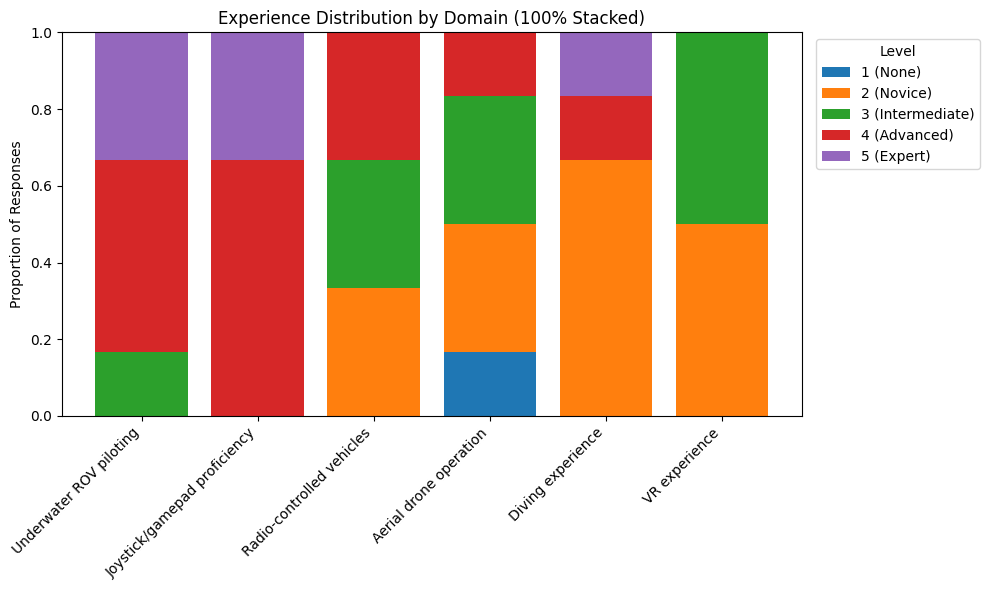

In [2]:
# assume df as before (counts per level)
prop = df.div(df.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))
levels = prop.columns
bottom = np.zeros(len(prop))

for lvl in levels:
    ax.bar(
        prop.index, prop[lvl],
        bottom=bottom,
        label=lvl
    )
    bottom += prop[lvl]

ax.set_ylabel('Proportion of Responses')
ax.set_title('Experience Distribution by Domain (100% Stacked)')
ax.legend(title='Level', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


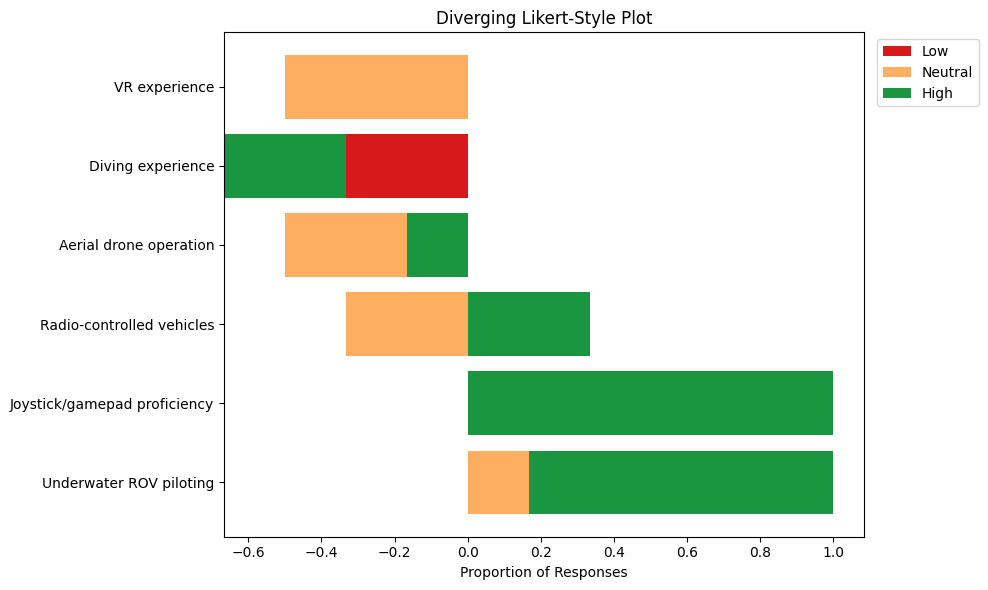

In [3]:
# split at level 3
neg = prop[['1 (None)', '2 (Novice)']].sum(axis=1)
neu = prop['3 (Intermediate)']
pos = prop[['4 (Advanced)', '5 (Expert)']].sum(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(prop))

ax.barh(y, -neg, color='#d7191c', label='Low')
ax.barh(y, neu, color='#fdae61', left=-neg, label='Neutral')
ax.barh(y, pos, color='#1a9641', left=-neg+neu, label='High')

ax.set_yticks(y)
ax.set_yticklabels(prop.index)
ax.set_xlabel('Proportion of Responses')
ax.set_title('Diverging Likert-Style Plot')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


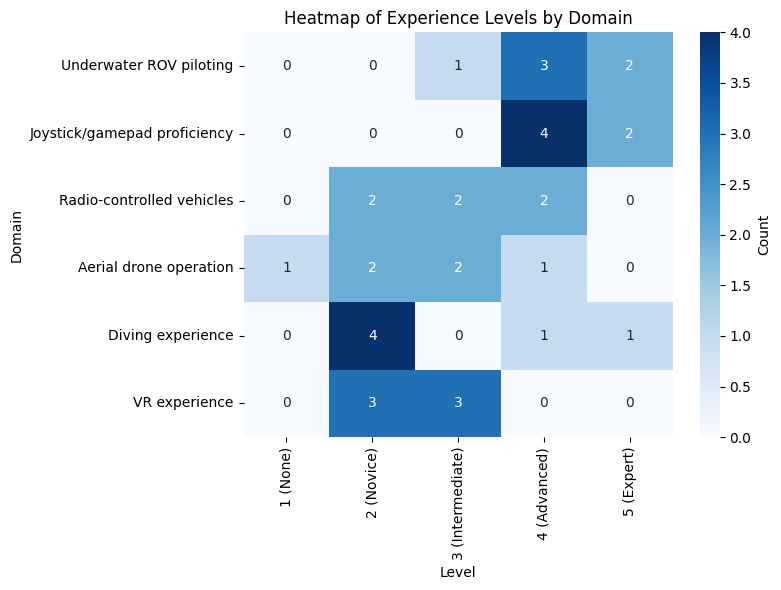

In [5]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    df,                # or prop if you want proportions
    annot=True,        # show numbers
    fmt='g',
    cmap='Blues',
    cbar_kws={'label': 'Count'}
)
ax.set_title('Heatmap of Experience Levels by Domain')
plt.ylabel('Domain')
plt.xlabel('Level')
plt.tight_layout()
plt.show()


/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/2708966656.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(levels, rotation=45, ha='right')
/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/2708966656.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(levels, rotation=45, ha='right')
/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/2708966656.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(levels, rotation=45, ha='right')
/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/2708966656.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

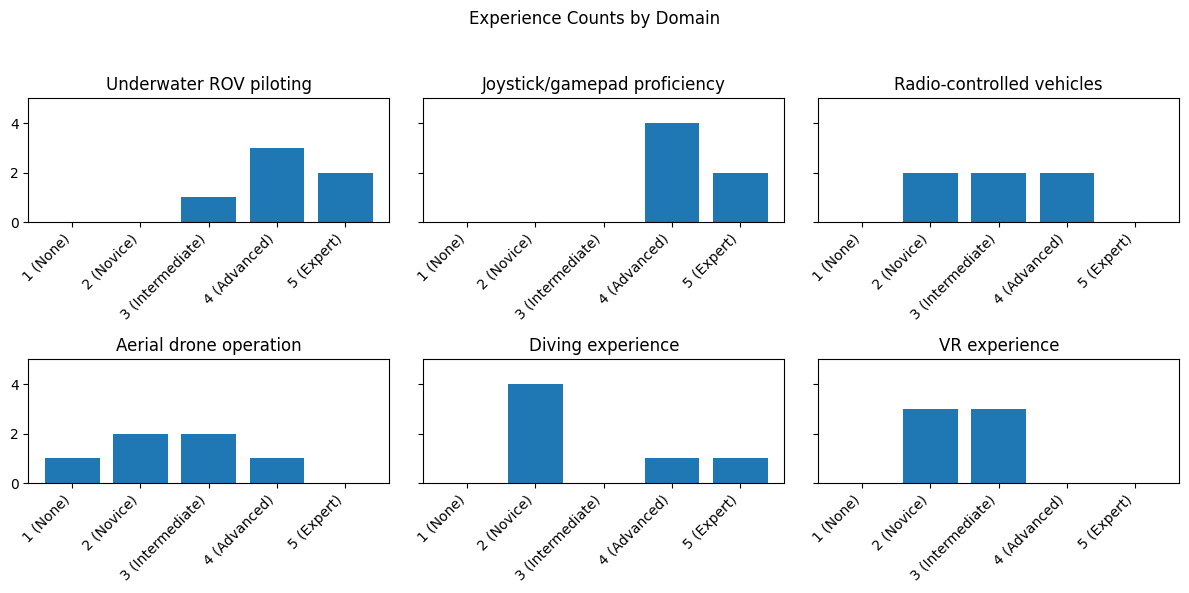

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharey=True)
axes = axes.flatten()

for ax, (domain, row) in zip(axes, df.iterrows()):
    ax.bar(levels, row)
    ax.set_title(domain)
    ax.set_xticklabels(levels, rotation=45, ha='right')
    ax.set_ylim(0, df.values.max() + 1)

fig.suptitle('Experience Counts by Domain')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/2620275510.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(levels, rotation=45, ha='right', fontsize=9)
/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/2620275510.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(levels, rotation=45, ha='right', fontsize=9)
/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/2620275510.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(levels, rotation=45, ha='right', fontsize=9)
/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/2620275510.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. a

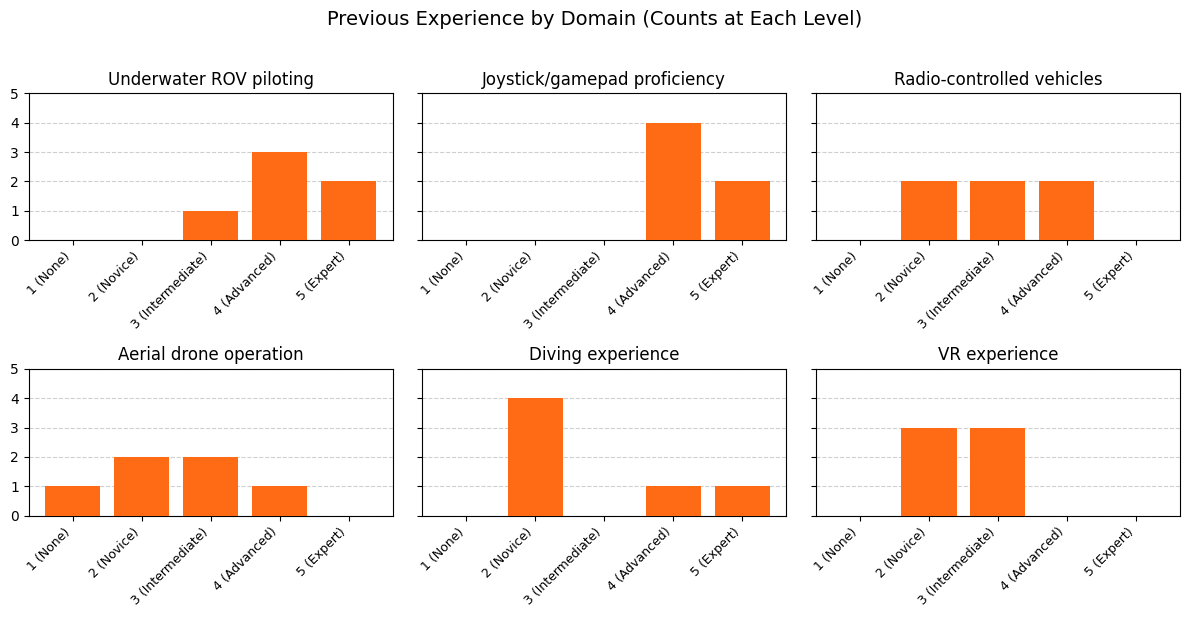

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ——— Your experience data (counts per level) ———
data = {
    'Domain': [
        'Underwater ROV piloting',
        'Joystick/gamepad proficiency',
        'Radio‐controlled vehicles',
        'Aerial drone operation',
        'Diving experience',
        'VR experience'
    ],
    '1 (None)':      [0, 0, 0, 1, 0, 0],
    '2 (Novice)':    [0, 0, 2, 2, 4, 3],
    '3 (Intermediate)': [1, 0, 2, 2, 0, 3],
    '4 (Advanced)':  [3, 4, 2, 1, 1, 0],
    '5 (Expert)':    [2, 2, 0, 0, 1, 0]
}
df = pd.DataFrame(data).set_index('Domain')

# ——— Plot small multiples ———
levels = df.columns
n_domains = len(df)
cols = 3
rows = int(np.ceil(n_domains / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3), sharey=True)
axes = axes.flatten()

for ax, (domain, counts) in zip(axes, df.iterrows()):
    ax.bar(levels, counts, color='#FF6B15', zorder=3)
    ax.set_title(domain, fontsize=12)
    ax.set_xticklabels(levels, rotation=45, ha='right', fontsize=9)
    ax.set_ylim(0, df.values.max() + 1)
    ax.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)
    ax.set_axisbelow(True)

# turn off any unused subplots
for ax in axes[n_domains:]:
    ax.axis('off')

fig.suptitle('Previous Experience by Domain (Counts at Each Level)', fontsize=14, y=1.02)
fig.tight_layout()
plt.show()


/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/3800607859.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(levels, rotation=45, ha='right', fontsize=9)
/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/3800607859.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(levels, rotation=45, ha='right', fontsize=9)
/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/3800607859.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(levels, rotation=45, ha='right', fontsize=9)
/var/folders/nt/xk67633j44b4_pkjsb6nvyyr0000gn/T/ipykernel_49485/3800607859.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. a

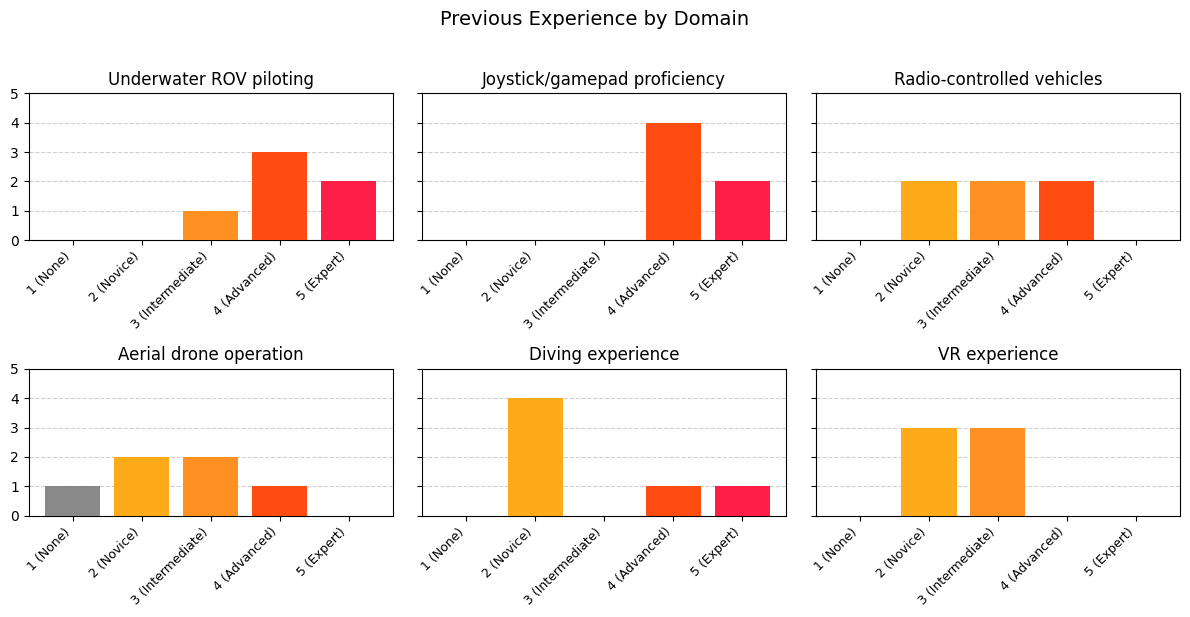

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ——— Your experience data (counts per level) ———
data = {
    'Domain': [
        'Underwater ROV piloting',
        'Joystick/gamepad proficiency',
        'Radio‐controlled vehicles',
        'Aerial drone operation',
        'Diving experience',
        'VR experience'
    ],
    '1 (None)':         [0, 0, 0, 1, 0, 0],
    '2 (Novice)':       [0, 0, 2, 2, 4, 3],
    '3 (Intermediate)': [1, 0, 2, 2, 0, 3],
    '4 (Advanced)':     [3, 4, 2, 1, 1, 0],
    '5 (Expert)':       [2, 2, 0, 0, 1, 0]
}
df = pd.DataFrame(data).set_index('Domain')

# ——— Define a color map for levels ———
level_colors = {
    '1 (None)':         '#898989',  # grayish
    '2 (Novice)':       '#FFAB19',         # pale orange
    '3 (Intermediate)': '#FF9122',         # yellow
    '4 (Advanced)':     '#FF4D11',         # orange
    '5 (Expert)':       '#FF1F46'          # red
}

# ——— Plot small multiples with level‐specific colors ———
levels = df.columns
n_domains = len(df)
cols = 3
rows = int(np.ceil(n_domains / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3), sharey=True)
axes = axes.flatten()

for ax, (domain, counts) in zip(axes, df.iterrows()):
    colors = [level_colors[lvl] for lvl in levels]
    ax.bar(
        levels,
        counts,
        color=colors,
        zorder=3
    )
    ax.set_title(domain, fontsize=12)
    ax.set_xticklabels(levels, rotation=45, ha='right', fontsize=9)
    ax.set_ylim(0, df.values.max() + 1)
    ax.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)
    ax.set_axisbelow(True)

# turn off any unused subplots
for ax in axes[n_domains:]:
    ax.axis('off')

fig.suptitle('Previous Experience by Domain', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
